In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

data_file = Path('Data') / 'Global_Cybersecurity_Threats_2015-2024.csv'
df = pd.read_csv(data_file)

# Distribution of numerical features

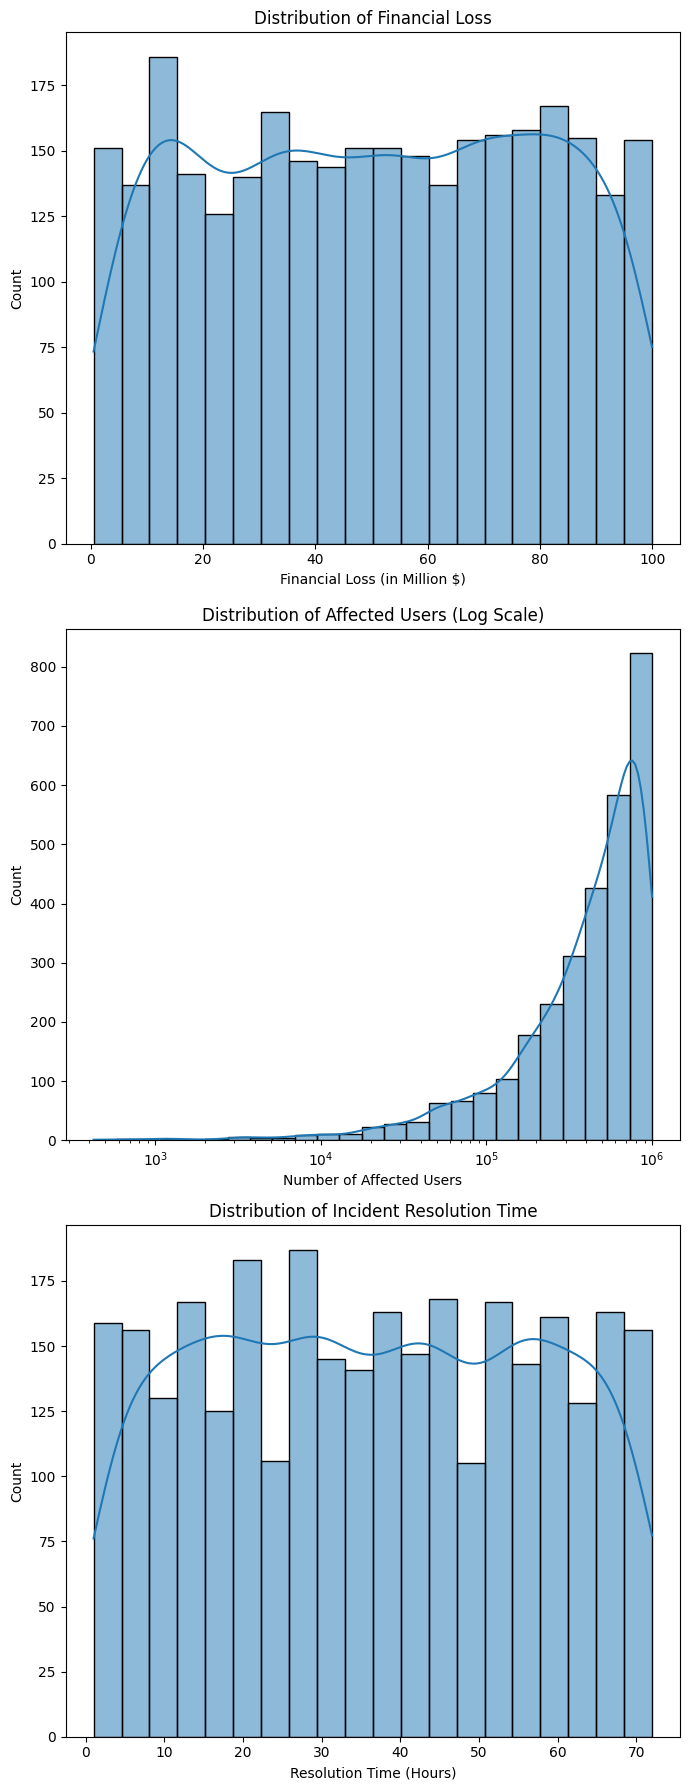

In [ ]:
def plot_numerical_distributions(df):
    fig, axes = plt.subplots(3, 1, figsize=(7, 18))
    
    sns.histplot(df['Financial Loss (in Million $)'], bins=20, kde=True, ax=axes[0])
    axes[0].set_title('Distribution of Financial Loss')
    axes[0].set_xlabel('Financial Loss (in Million $)')
    
    sns.histplot(df['Number of Affected Users'], bins=25, kde=True, ax=axes[1], log_scale=True)
    axes[1].set_title('Distribution of Affected Users (Log Scale)')
    axes[1].set_xlabel('Number of Affected Users')
    
    sns.histplot(df['Incident Resolution Time (in Hours)'], bins=20, kde=True, ax=axes[2])
    axes[2].set_title('Distribution of Incident Resolution Time')
    axes[2].set_xlabel('Resolution Time (Hours)')
    
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df)

# Distribution of categorical features

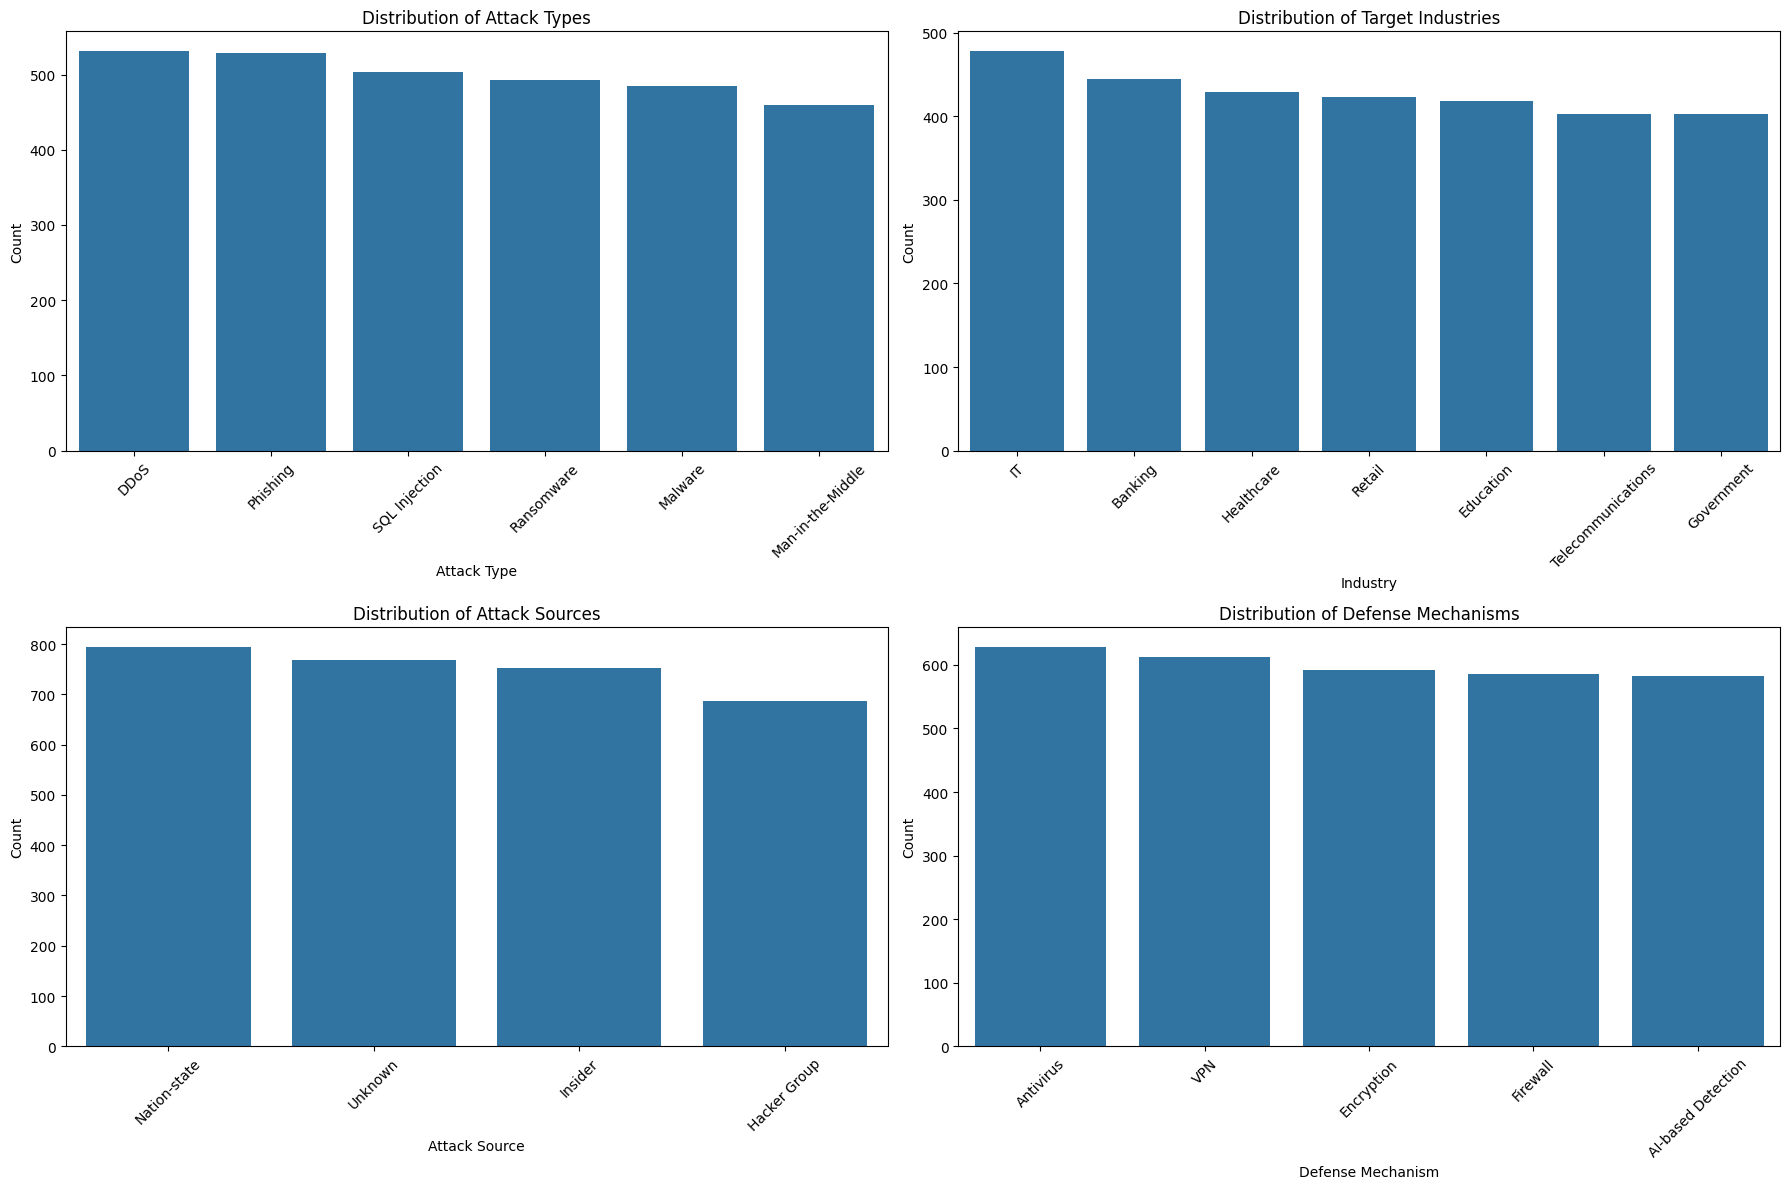

In [10]:
def plot_categorical_distributions(df):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    attack_counts = df['Attack Type'].value_counts()
    sns.barplot(x=attack_counts.index, y=attack_counts.values, ax=axes[0, 0])
    axes[0, 0].set_title('Distribution of Attack Types')
    axes[0, 0].set_xlabel('Attack Type')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    industry_counts = df['Target Industry'].value_counts()
    sns.barplot(x=industry_counts.index, y=industry_counts.values, ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of Target Industries')
    axes[0, 1].set_xlabel('Industry')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    source_counts = df['Attack Source'].value_counts()
    sns.barplot(x=source_counts.index, y=source_counts.values, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Attack Sources')
    axes[1, 0].set_xlabel('Attack Source')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    defense_counts = df['Defense Mechanism Used'].value_counts()
    sns.barplot(x=defense_counts.index, y=defense_counts.values, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Defense Mechanisms')
    axes[1, 1].set_xlabel('Defense Mechanism')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)

# Time Trends

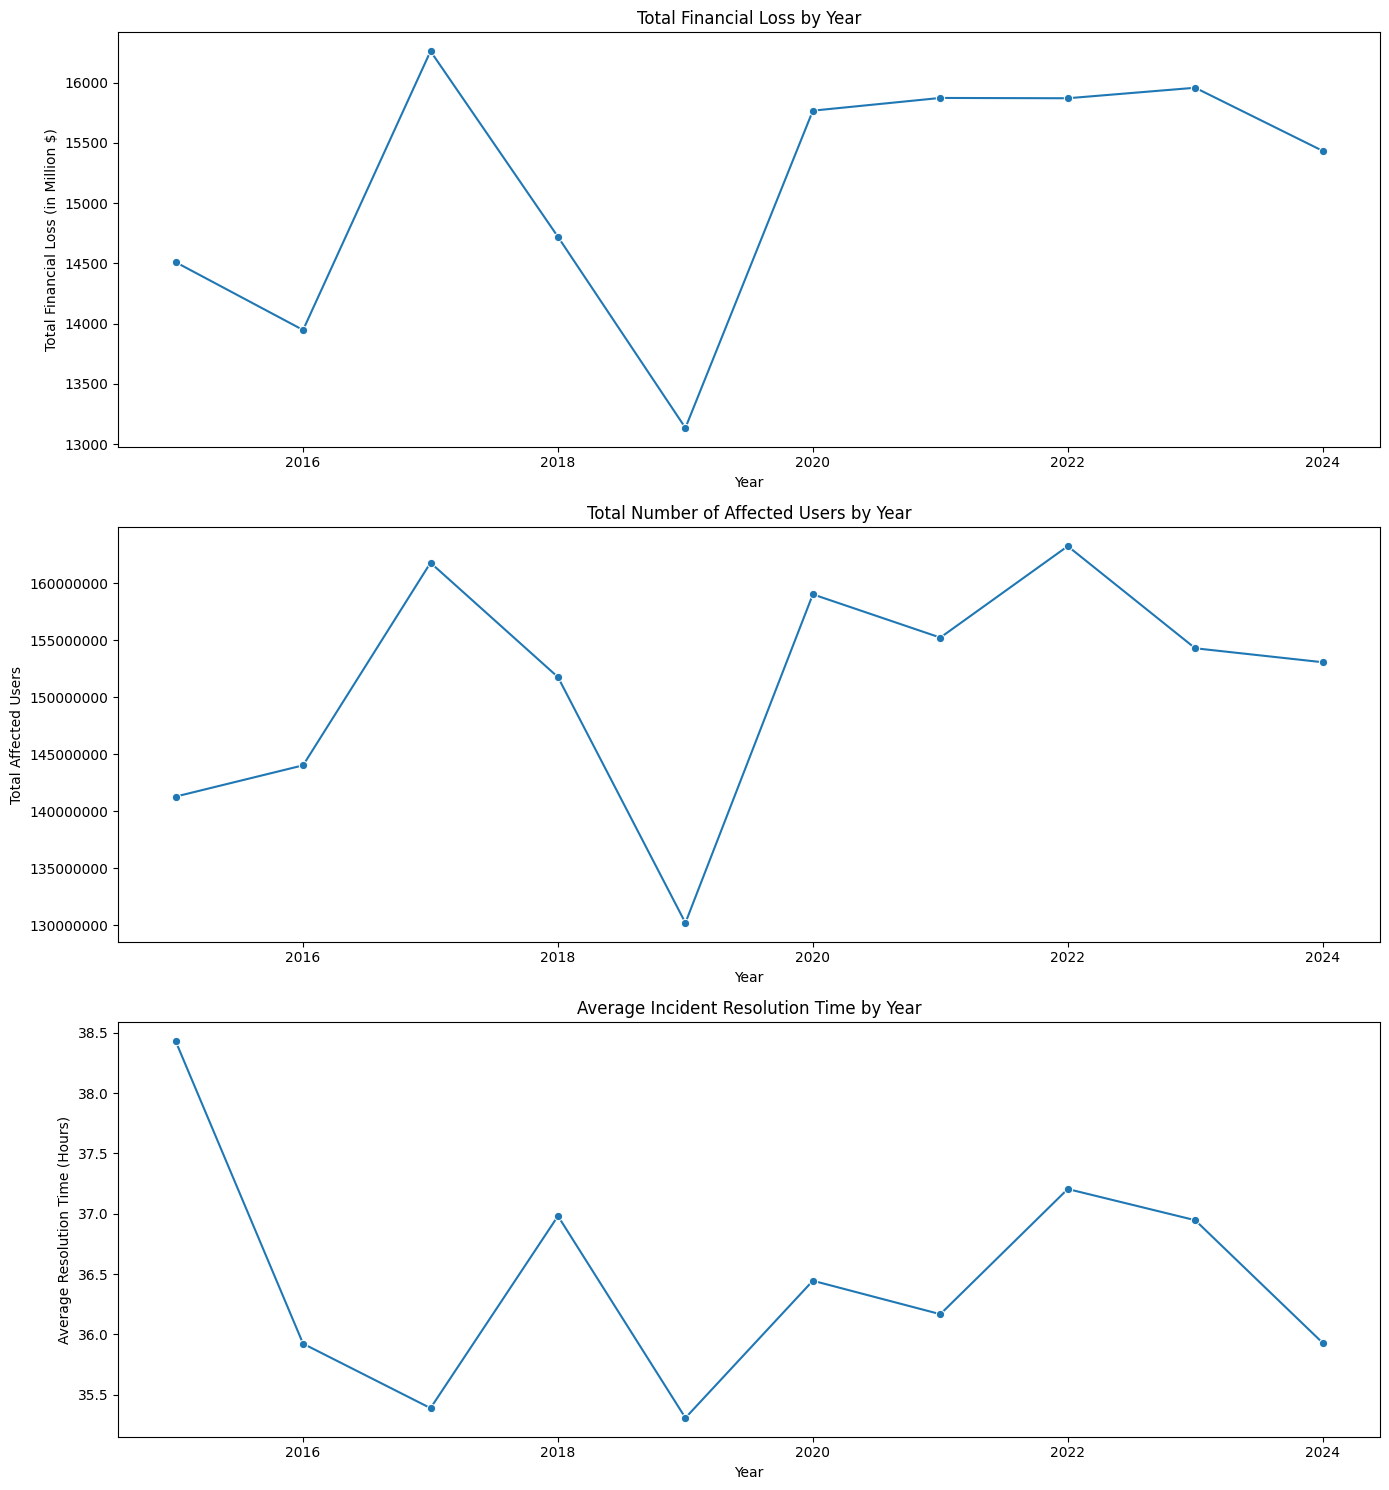

In [ ]:
def plot_time_trends(df):
    yearly_stats = df.groupby('Year').agg({
        'Financial Loss (in Million $)': 'sum',
        'Number of Affected Users': 'sum',
        'Incident Resolution Time (in Hours)': 'mean'
    }).reset_index()
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 15))
    
    sns.lineplot(data=yearly_stats, x='Year', y='Financial Loss (in Million $)', marker='o', ax=axes[0])
    axes[0].set_title('Total Financial Loss by Year')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Total Financial Loss (in Million $)')
    
    sns.lineplot(data=yearly_stats, x='Year', y='Number of Affected Users', marker='o', ax=axes[1])
    axes[1].set_title('Total Number of Affected Users by Year')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Total Affected Users')
    axes[1].ticklabel_format(style='plain', axis='y')
    
    sns.lineplot(data=yearly_stats, x='Year', y='Incident Resolution Time (in Hours)', marker='o', ax=axes[2])
    axes[2].set_title('Average Incident Resolution Time by Year')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Average Resolution Time (Hours)')
    
    plt.tight_layout()
    plt.show()

plot_time_trends(df)

# How busy is each year?

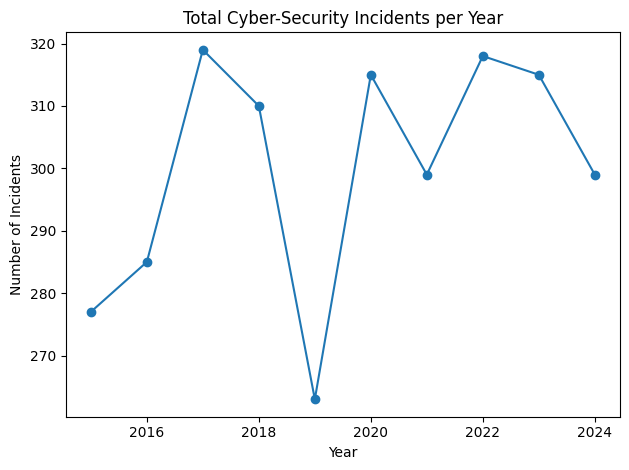

In [4]:
(
    df.groupby("Year")
      .size()
      .plot(kind="line", marker="o")
)
plt.title("Total Cyber-Security Incidents per Year")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Which attack types dominate?

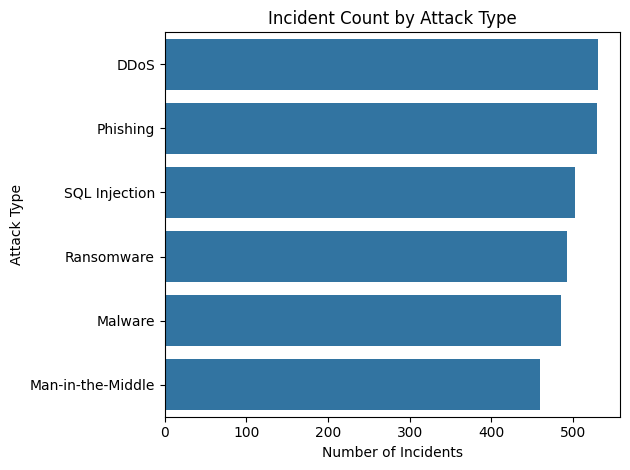

In [5]:
sns.countplot(
    data=df,
    y="Attack Type",
    order=df["Attack Type"].value_counts().index,
)
plt.title("Incident Count by Attack Type")
plt.ylabel("Attack Type")
plt.xlabel("Number of Incidents")
plt.tight_layout()
plt.show()

# How costly are different attack types?

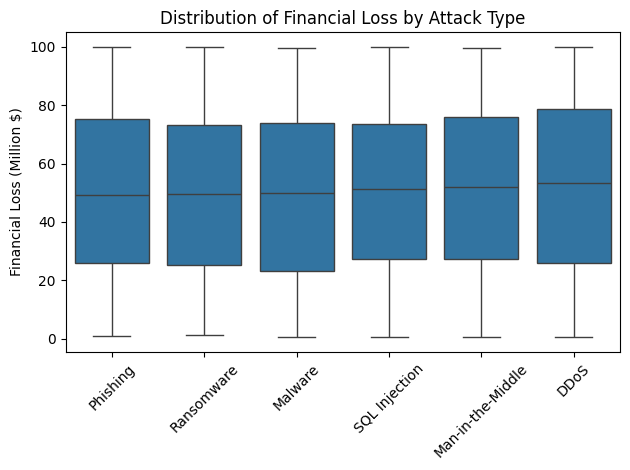

In [6]:
sns.boxplot(
    data=df,
    x="Attack Type",
    y="Financial Loss (in Million $)",
    order=df.groupby("Attack Type")["Financial Loss (in Million $)"].median().sort_values().index,
)
plt.xticks(rotation=45)
plt.title("Distribution of Financial Loss by Attack Type")
plt.ylabel("Financial Loss (Million $)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Country vs. Year heat-map of mean losses

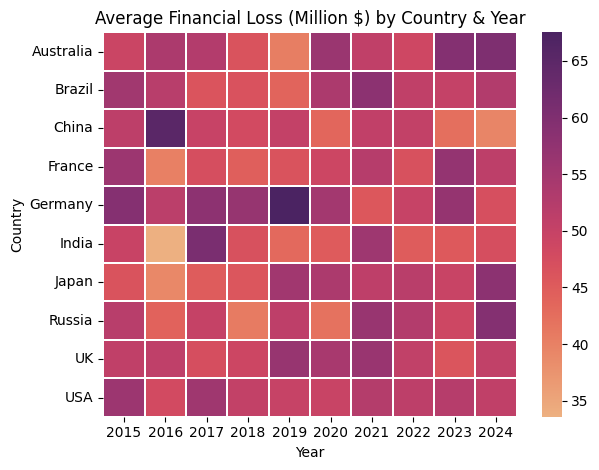

In [ ]:
pivot_loss = (
    df.pivot_table(
        index="Country",
        columns="Year",
        values="Financial Loss (in Million $)",
        aggfunc="mean",
    )
)

sns.heatmap(
    pivot_loss,
    annot=False,
    cmap="flare",
    linewidths=.3
)
plt.title("Average Financial Loss (Million $) by Country & Year")
plt.ylabel("Country")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


# What drives long resolution times?

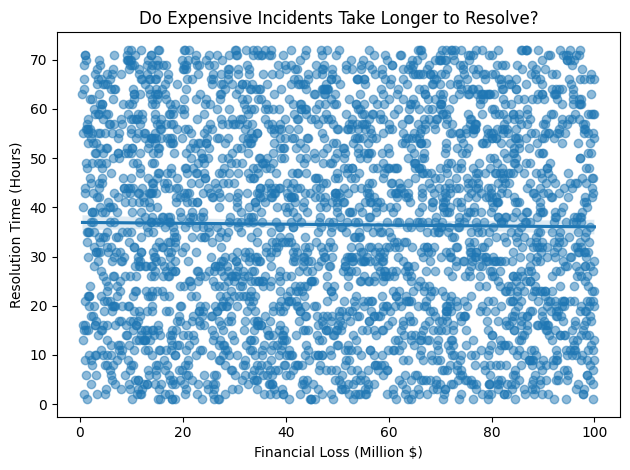

In [ ]:
sns.regplot(
    data=df,
    x="Financial Loss (in Million $)",
    y="Incident Resolution Time (in Hours)",
    scatter_kws={"alpha":0.5}
)
plt.title("Do Expensive Incidents Take Longer to Resolve?")
plt.xlabel("Financial Loss (Million $)")
plt.ylabel("Resolution Time (Hours)")
plt.tight_layout()
plt.show()